# Preprocessing & Augmentation Visualization

This notebook contains an example of how we preprocessed and augmented slices during training. While training, each slice was preprocessed, and there was a 50% chance that an image would be flipped horizontally (i.e. left to right) and a 50% chance that the image would be slightly randomly rotated (between -10 and 10 degrees).

##### Imports

In [1]:
# Packages
import pandas as pd
import os
import sys
import torch
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append(".")
sys.path.append("..")
from visualisation.slice_plotter import plot_slice_by_acquisition

##### Loading Data

In [3]:
DATA_DIR = "../../../data/sliced-data/train"

In [4]:
label_df = pd.read_csv(os.path.join(DATA_DIR, "labels_slices.csv"), names=["patient_nr", "slice_nr", "class"])
label_df.head()

,patient_nr,slice_nr,class
0,797,0,True
1,797,1,True
2,797,2,True
3,797,3,True
4,797,4,True


### Plotting Original, Preprocessed and Augmented Images

Patient 1959 (Abnormal)
torch.Size([3, 512, 512])


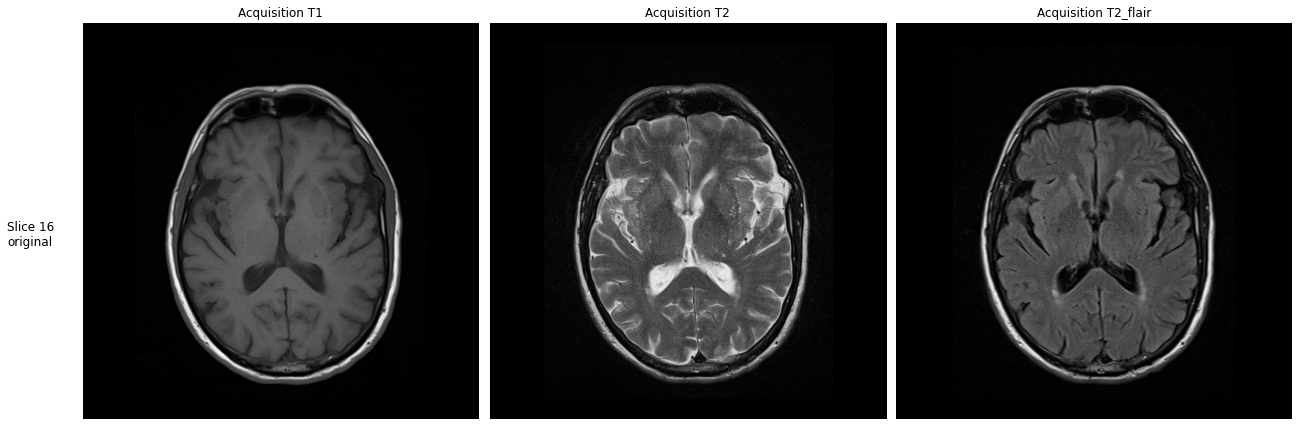

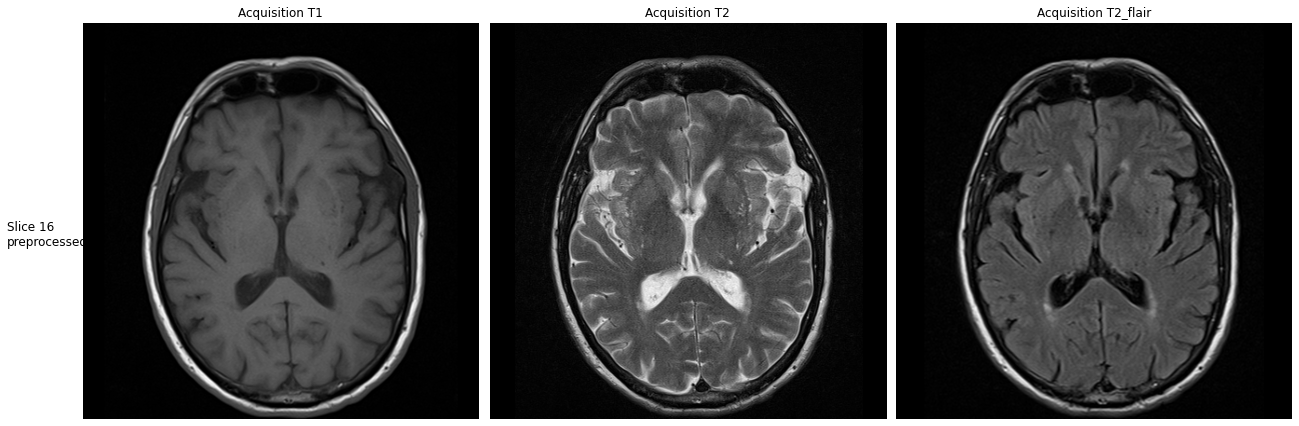

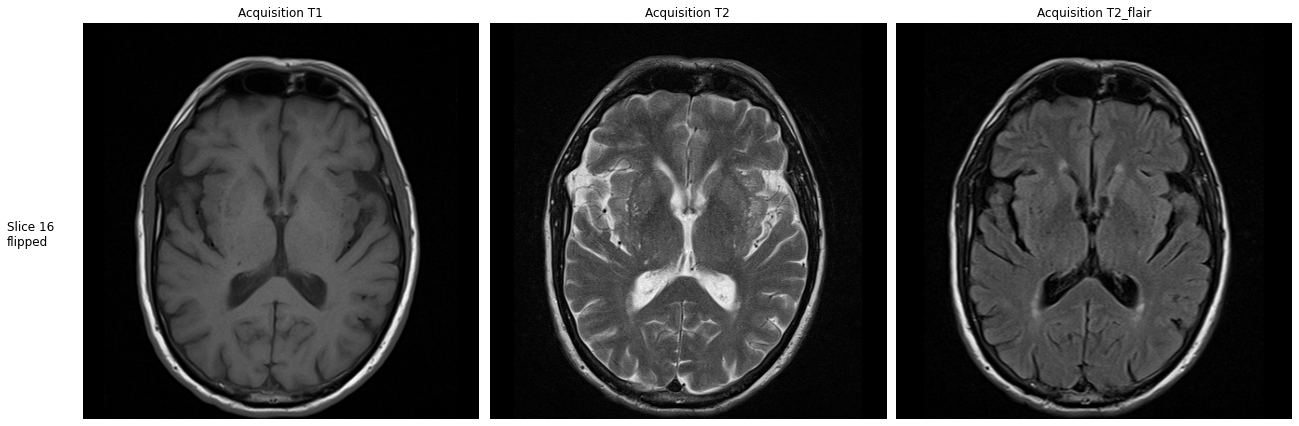

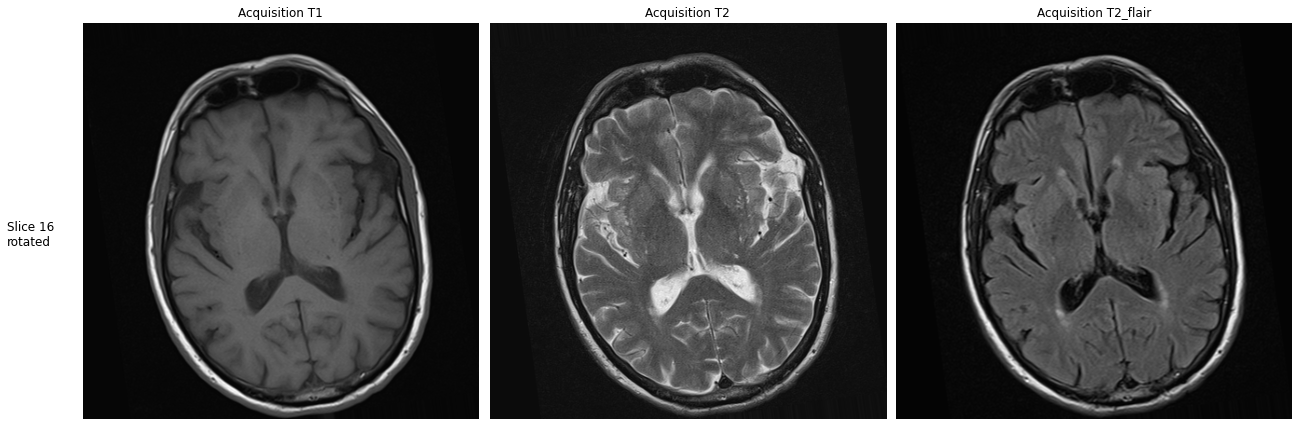

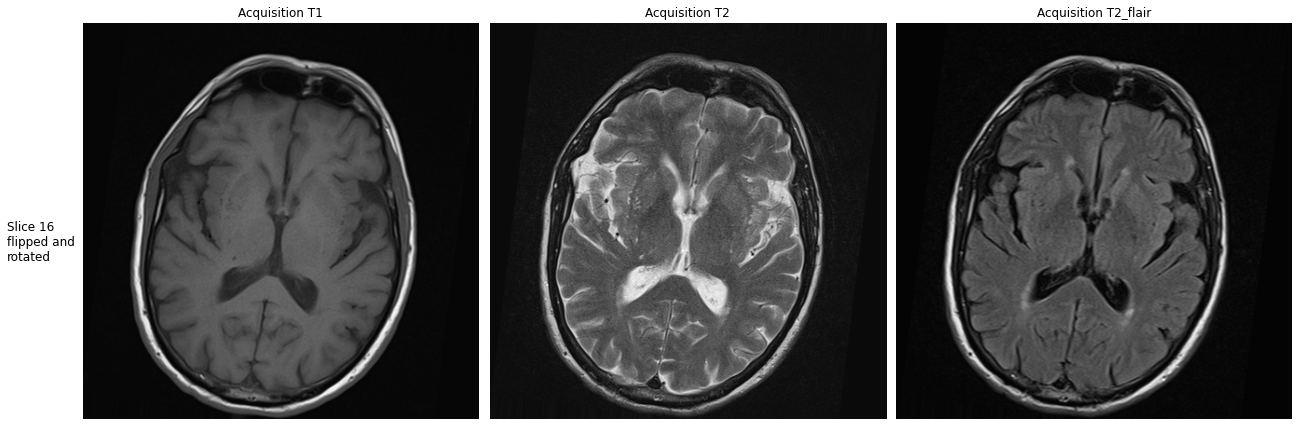

In [18]:
EXAMPLE_INDEX = 5456

row = label_df.loc[EXAMPLE_INDEX]
slice_nr = row['slice_nr']
patient_nr = row['patient_nr']
c = "Abnormal" if row['class'] else "Normal"
print(f"Patient {patient_nr} ({c})")
X = torch.load(f"{DATA_DIR}/{patient_nr}_{slice_nr}.pt")

print(X.shape)

from dataset.preprocessing import preprocess, augment
import matplotlib.pyplot as plt

X_preproc = preprocess(X)
X_flip = augment(X_preproc, 1, 0)
X_rotate = augment(X_preproc, 0, 1)
X_flip_rotate = augment(X_flip, 0, 1)

plot_slice_by_acquisition(X, f"{slice_nr}\noriginal", False)
plt.gcf().tight_layout(rect=[0.05,0,1,1])
plot_slice_by_acquisition(X_preproc, f"{slice_nr}\npreprocessed", False)
plt.gcf().tight_layout(rect=[0.05,0,1,1])
plot_slice_by_acquisition(X_flip, f"{slice_nr}\nflipped", False)
plt.gcf().tight_layout(rect=[0.05,0,1,1])
plot_slice_by_acquisition(X_rotate, f"{slice_nr}\nrotated", False)
plt.gcf().tight_layout(rect=[0.05,0,1,1])
plot_slice_by_acquisition(X_flip_rotate, f"{slice_nr}\nflipped and\nrotated", False)  
plt.gcf().tight_layout(rect=[0.05,0,1,1])